In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
xs=np.array([[0.34,0.7],[0.1,0.8],[0.2,0.4],[0.8,0.25],[0.2,0.9],[0.25,0.45],[0.15,0.7],[0.9,0.8],[0.32,0.8],[0.3,0.15]])
ys=np.array([[1],[0],[1],[1],[0],[1],[0],[1],[0],[1]])

In [3]:
#创建占位符
X=tf.placeholder(tf.float32,[None,2],name='input_x')
Y=tf.placeholder(tf.float32,[None,1])
#创建变量
w=tf.Variable(tf.zeros([2,1]),name='weight')
b=tf.Variable(tf.zeros([1,1]),name='bias')
y_predict=tf.sigmoid(tf.add(tf.matmul(X,w),b),name='y_p')
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(y_predict)+(1-Y)*tf.log(1-y_predict),reduction_indices=1))
optimizer=tf.train.AdamOptimizer(0.2).minimize(cost)

rm: cannot remove ‘model/*’: No such file or directory
train_cost is: 0.478272
train_cost is: 0.458112
train_cost is: 0.410306
train_cost is: 0.350043
train_cost is: 0.300387
train_cost is: 0.262798
train_cost is: 0.231362
train_cost is: 0.203298
train_cost is: 0.178681
train_cost is: 0.157673
train_cost is: 0.139777
train_cost is: 0.124332
train_cost is: 0.110882
train_cost is: 0.0991416
train_cost is: 0.0888869
train_cost is: 0.0799069
train_cost is: 0.0720138
train_cost is: 0.0650515
train_cost is: 0.0588928
train_cost is: 0.0534313
train_cost is: 0.0485756
train_cost is: 0.0442476
train_cost is: 0.0403805
train_cost is: 0.036917
train_cost is: 0.0338085
train_cost is: 0.0310124
train_cost is: 0.0284924
train_cost is: 0.0262166
train_cost is: 0.0241576
train_cost is: 0.0222913
train_cost is: 0.0205968
train_cost is: 0.0190557
train_cost is: 0.0176517
train_cost is: 0.0163708
train_cost is: 0.0152003
train_cost is: 0.0141293
train_cost is: 0.0131478
train_cost is: 0.0122472
train_cos

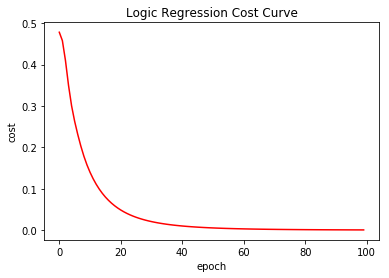

In [4]:
cost_accum=[]
cost_prev=0
num_epoch=100
! rm -r model/*
with tf.Session() as sess:
    #初始化所有变量
    sess.run(tf.global_variables_initializer())
    #开始训练
    for epoch in range(num_epoch):
        for x,y in zip(xs,ys):
            sess.run(optimizer,feed_dict={X:[x],Y:[y]})
        train_cost=sess.run(cost,feed_dict={X:[x],Y:[y]})
        cost_accum.append(train_cost)
        print "train_cost is:",str(train_cost)
  
        if np.abs(cost_prev-train_cost)<1e-6:
            break
        cost_prev=train_cost
    saver = tf.train.Saver()
    saver.save(sess, 'model/lr.ckpt',global_step=num_epoch)
    
    #保存模型后，最终输出变量名及其值
    variable_names = [v.name for v in tf.trainable_variables()]
    values = sess.run(variable_names)
    for k,v in zip(variable_names, values):
        print("Variable: ", k)
        print("Shape: ", v.shape)
        print(v)
plt.plot(range(len(cost_accum)),cost_accum,'r')
plt.title('Logic Regression Cost Curve')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [7]:
reader = tf.train.NewCheckpointReader('model/lr.ckpt-100')
dic = reader.get_variable_to_shape_map()
print(dic)
w = reader.get_tensor("weight")
print(type(w))
print(w.shape)
print(w)

{'weight/Adam_1': [2, 1], 'weight/Adam': [2, 1], 'weight': [2, 1], 'bias/Adam_1': [1, 1], 'beta2_power': [], 'bias': [1, 1], 'bias/Adam': [1, 1], 'beta1_power': []}
<type 'numpy.ndarray'>
(2, 1)
[[ 16.18063545]
 [-13.66607475]]


In [8]:
x_test=np.array([[0.32,0.5],[0.16,0.4],[0.02,0.8]])
with tf.Session() as sess:
    path = 'model/'
    dir_list=os.listdir(path)
    for file in dir_list:
        if 'meta' in file:
            meta_path = path + file
            print meta_path
    saver = tf.train.import_meta_graph(meta_path)
    saver.restore(sess, tf.train.latest_checkpoint(path))
    print('load model successfully.')
    print sess.run('weight:0'),sess.run('bias:0')
    graph = tf.get_default_graph()
    input_x = graph.get_tensor_by_name('input_x:0')
    logit=graph.get_tensor_by_name('y_p:0')
    feed_dict = {input_x: x_test}
    result = sess.run(logit, feed_dict=feed_dict)
    print('Prediction result:', result)

model/lr.ckpt-100.meta
INFO:tensorflow:Restoring parameters from model/lr.ckpt-100
load model successfully.
[[ 16.18063545]
 [-13.66607475]] [[ 4.80106735]]
('Prediction result:', array([[ 0.95874417],
       [ 0.87253255],
       [ 0.0029939 ]], dtype=float32))
